# Final Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

%matplotlib inline

# ***DATA UNDERSTANDING***

In [2]:
#uploading the dataset
df = pd.read_csv('Data/kc_house_data_train.csv', index_col = 'Unnamed: 0')

In [3]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283


In [4]:
df.dtypes.head(2)

id       int64
date    object
dtype: object

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


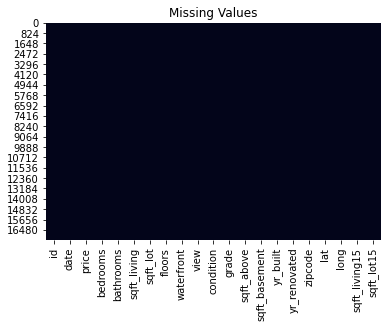

In [6]:
#checking for missing values
ax = plt.axes()
sns.heatmap(df.isnull(), cbar=False)
ax.set_title('Missing Values')
plt.show();

There are no missing values in this dataset but that does not rule out some outlier data.

# ***CLEANING PROCESS***

Looking at the first few columns:

-**Date**

In [7]:
#putting the date column into datetime
df['date'] = pd.to_datetime(df['date'])
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283


In [8]:
df['date'].nunique(), df.shape[0]

(371, 17290)

For the amount of rows in this dataset, there are only 371 unique dates. 

-**Bedrooms**

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


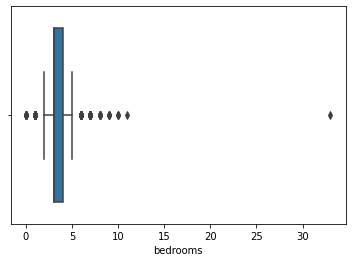

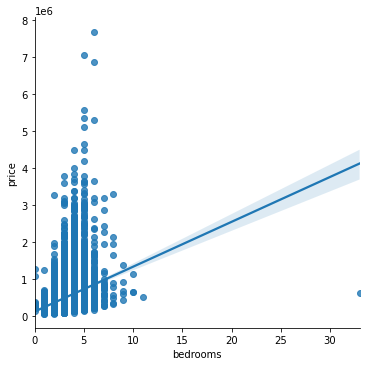

In [9]:
sns.boxplot(df['bedrooms']);
sns.lmplot(x='bedrooms', y='price', data = df)

The 33 bedrooms, I believe, is most definitely a misprint. After checking the sqft_living of the home compared to the other upper bound bedrooms, I noticed that logically the squarefootage woudn't make sense. And when looking at the graphs above it looks strange that there is a price dip after 6 bedrooms. I am going to impute from there.

In [10]:
df[df['bedrooms'] == 0].head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
483,3374500520,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
1120,6306400140,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000


And on that note, I would impute the ones with the bedrooms that are 0. That seems unrealistic that a home would not have a bedroom. I will make them 1.

In [11]:
conditions = [df['bedrooms'] > 6, df['bedrooms'] < 1]
choices = [6, 1]

df['bedrooms'] = np.select(conditions, choices, df['bedrooms'])

-**Bathrooms**

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


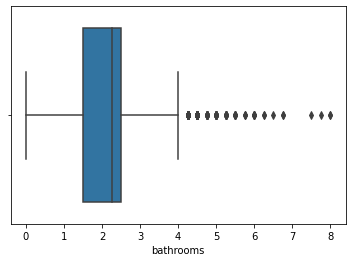

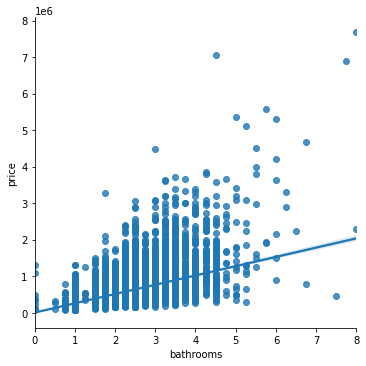

In [12]:
sns.boxplot(df['bathrooms']);
sns.lmplot(x='bathrooms', y = 'price', data = df)

I am going to impute this value at based on the outliers at 5. I feel that a home with more than that is not as common.

In [13]:
df['bathrooms'] = np.where(df['bathrooms'] > 5, 5, df['bathrooms'])

In [14]:
df[df['bathrooms'] == 0].head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
483,3374500520,2015-04-29,355000.0,1,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
1120,6306400140,2014-06-12,1095000.0,1,0.0,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000


The properties with 0 bathrooms are interesting. I am going to impute them at 1. It is highly unlikely for a home to not have a bathroom.

In [15]:
df['bathrooms'] = np.where(df['bathrooms'] == 0, 1, df['bathrooms'])

-**Sqft_Living**

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


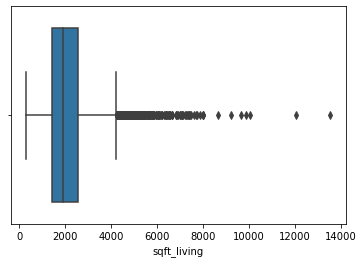

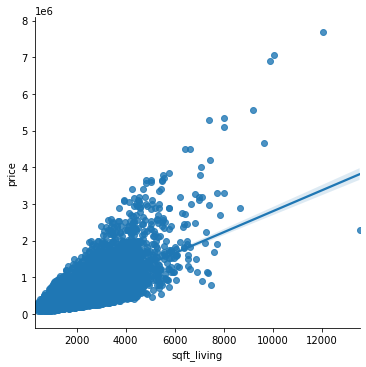

In [16]:
sns.boxplot(df['sqft_living']);
sns.lmplot(x='sqft_living', y='price', data = df)

Based on the plots above I am going to make a cap at 8000. The linear pattern breaks around there so I feel it is a good place to make an adjustment.

In [17]:
df['sqft_living']=np.where(df['sqft_living'] > 8000, 8000, df['sqft_living'])

-**Sqft_Lot**

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


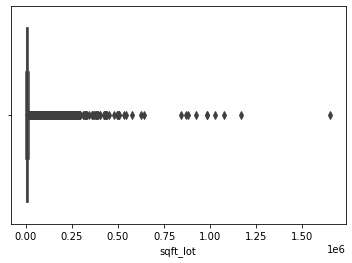

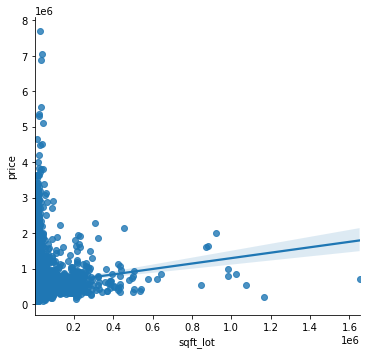

In [18]:
sns.boxplot(df['sqft_lot']);
sns.lmplot(x='sqft_lot', y='price', data=df)

Based on the plots above I am going to make a cut at 600000. It seems the price drops down a bit from here. I find it interesting that more land would cost less. Owning a lot of land I would ideally think would be more costly.

In [19]:
df['sqft_lot']=np.where(df['sqft_lot'] > 600000, 600000, df['sqft_lot'])

While I am on this, I will also take a look at the sqft_living15 and sqft_lot15 columns

-**Sqft_Living15**

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living15'>

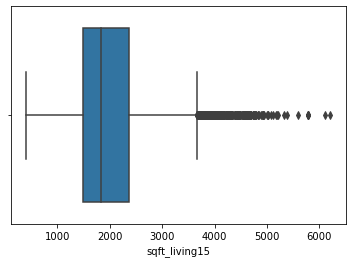

In [20]:
sns.boxplot(df['sqft_living15'])

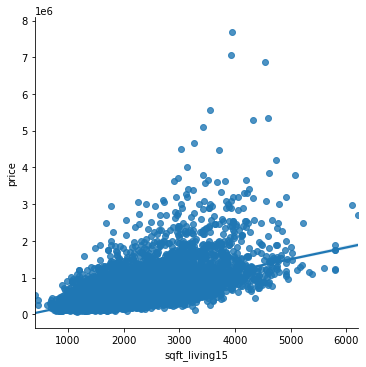

In [21]:
sns.lmplot(x='sqft_living15', y='price', data = df)

Based on this plot I am going to make a cut at 5000. The positive trend, which I believe is to be expected sort of breaks around here. 

In [22]:
df['sqft_living15']=np.where(df['sqft_living15'] > 5000, 5000, df['sqft_living15'])

-**Sqft_Lot15**

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


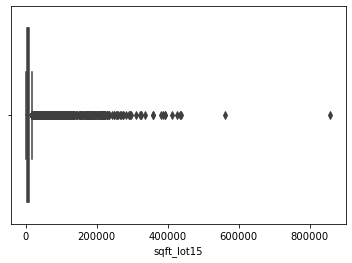

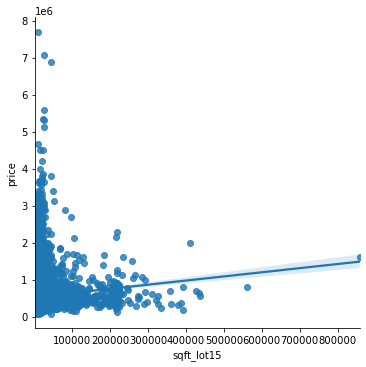

In [23]:
sns.boxplot(df['sqft_lot15']);
sns.lmplot(x='sqft_lot15', y = 'price', data=df )

From the graphs above I am going to impute at 300000. There seems to be a slow decrease in price as land goes up with the exception of the one point around 400000. I would think it would increase at lot increases.

In [24]:
df['sqft_lot15']=np.where(df['sqft_lot15'] > 300000, 300000, df['sqft_lot15'])

That takes care of the major numerical values for now. Onto the other features.

-**Floors**

In [25]:
#Looking at the floors column
df[df['floors'] == 1].head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,7974200820,2014-08-21,865000.0,5,3.0,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
7,7010701383,2014-10-17,680000.0,3,2.5,1800,4400,1.0,0,0,...,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400


Just as I suspected, the floors column does NOT include the basement. If you add the sqft_basement and sqft_above, you get the sqft_living amount. I am going to add a new floor column for easy clarification. But first I will create a has basement column.

In [26]:
#creating a has basement column
df['has_basement'] = np.where(df['sqft_basement'] != 0, 1, 0)

#creating a floor including basement column
df['floor_base'] = df['floors'] + df['has_basement']

-**Condition and Grade**

In [27]:
#Trying to gage which condition and grade represents the higher values 
#condition is on a scale of 1-5 and grade is 1-13.
df[['price', 'condition', 'grade']].sort_values(by='price', ascending = False).head()

,price,condition,grade
10366,7700000.0,4,13
6903,7062500.0,3,11
7519,6885000.0,3,13
2232,5570000.0,3,13
1979,5350000.0,3,12


It appears that both condition and grade are ranked with the largest number being the largest value. That can be indicated by the high prices. Given that there are 13 categories for grade, I am going to try to group them to make them smaller and easier to understand. Based on the Kings County Building Grade, the threshold for AVERAGE starts at 7 and the threshold for ABOVE AVERAGE begins at 10. I am going to create 3 groups from this.

In [28]:
#creating a new_grades column
conditions = [df['grade'] <=6, df['grade'] <=9, df['grade'] >= 10]
choices = [1, 2, 3] #1 is Below Average, 2 is Average, 3 is Above
df['new_grades'] = np.select(conditions, choices)

-**Renovations**

I am also going to make a new column called most_recent_decade. This will combine the yr_built and yr_renovated column. This will tell you the most recent renovation of the home -- assuming yr_built is the most recent renovation, given a 0 in the yr_renovated column-- and I will group it by decade.

In [29]:
df['most_recent_decade'] = np.where(df['yr_renovated'] != 0, df['yr_renovated'], df['yr_built'])
df['most_recent_decade'].astype('int')
df['most_recent_decade'] = df['most_recent_decade']//10*10

In [30]:
#taking a look at the price and zipcodes
df.groupby('zipcode')['price'].var().head(2)

zipcode
98001    9.880581e+09
98002    2.843955e+09
Name: price, dtype: float64

In [31]:
sorted(df.groupby('zipcode')['price'].mean(), reverse = True)[:3]

[2202790.0, 1396882.8902953586, 1183018.0]

The price and zipcode variance is quite different between zipcodes. This leads me to believe that location seems of utmost importance when determining price. 

**I will most likely use this in my model, but to make sure, I will look at this variable visually**

# ***FEATURE ENGINEERING***

>In the cells below I will construct an interaction feature between renovation (converted into a dummy variable) and squarefoot_living.

I believe there is an interaction between renovation and sqft_living. Often renovations include expansions which can increase the value of your home. I am curious to see if an interaction between renovation year and home size is applicable.

In [32]:
#creating a been_renovated column for a dummy variable for an interaction feature. 
df['been_renovated'] = np.where(df['yr_renovated'] != 0, 1, df['yr_renovated'])

In [33]:
df = pd.get_dummies(df, columns=['been_renovated'], drop_first = True)

In [34]:
df['reno_size'] = df['been_renovated_1']*df['sqft_living']

>In the cells below I will construct a distance to work feature:

In 2015, The Boeing Co., Microsoft, and Amazon are among the top employers in Washington State not the mention the King County area. Their employee numbers keep increasing annually. 

I'm sure that proximity to work adds value to the home. I am going to add distance to work columns for each of them, given that latitude and longitude has been provided using the haversine fomula.

In [35]:
#merging latitude and longitude into a column of tuples.
df['lat_long'] = list(zip(df['lat'], df['long']))

In [36]:
#creating a function to convert the latitude and longitude distances to miles
from math import radians, sin, cos, atan2, sqrt

#These are the coordinates for Amazon, Boeing, and Microsoft Headquarters
businesses=[(47.622288, -122.336494),(47.532531, -122.311605), (47.639323, -122.128383)]

#This is a list of lat long coordinates of homes
lat_long = list(df['lat_long'])

def distance_from(home, business):
    """
    Uses the haversine formula to calculate the average distance between the homes and 
    popular work headquarters then converts the distance into miles.
    """
    #radius of earth in km
    R = 6373
    
    lat1 = radians(business[0])
    long1 = radians(business[1])
    lat2 = radians(home[0])
    long2 = radians(home[1])

    dlon = long2 - long1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    #divide by 1.609 to convert into miles
    distance = R*c / 1.609
    return distance

In [37]:
distances = []

#getting the distance(in miles) between the three workplaces and the residences
for business in businesses:
    for home in lat_long:
        distances.append(distance_from(home, business))
        
#making the three separate columns for them
df['amazon'] = np.array(distances[:df.shape[0]])
df['boeing'] = np.array(distances[df.shape[0]:df.shape[0]*2])
df['microsoft'] = np.array(distances[df.shape[0]*2:])



> I am finally going to create a polynomial feature for the size of the yard. I feel this could be very good to include. A large yard size often leaves room for potential expansions, additions, and more amenities like pools.

In [38]:
#Subtracting the lot size by the approximate living space of a single floor
#The floor_base column has the basement in consideration as a floor. 
#This needed to be done to account for total living space.
df['yard_size'] = df['sqft_lot'] - (df['sqft_living'] / df['floor_base'])

In [39]:
#transforming it into a polynomial feature
df['yard_size2']=df['yard_size']*df['yard_size']

# ***STATISTICAL TESTING***

I would be interested in investigating whether or not the bedrooms or bathrooms are more influential on price. You would think that because of the plumbing, the cost of a bathroom would drive the price up. I will keep the bathroom and bedroom factors equal and hypothesize that the mean price of a home with 3 bathrooms is greater than the mean price of a home with 3 bathrooms. I am also going to make sure that the home was renovated since 2000 to account for the fact that work has been put into the home.

>NULL HYPOTHESIS: Mean Price Bathrooms <= Mean Price Bedrooms  
ALT HYPOTHESIS: Mean Price Bathrooms > Mean Price Bedrooms

In [40]:
#For this test, I am going to use an alpha level of .05

#Putting the two samples together
bathroom_population = df[(df['bathrooms'] == 3) & (df['yr_renovated'] > 2000)]
bedroom_population = df[(df['bedrooms'] == 3) & (df['yr_renovated'] > 2000)]

bathrooms = bathroom_population['price']
bedrooms = bedroom_population['price']

t = stats.ttest_ind(bathrooms, bedrooms, alternative = 'greater')
print(t)

Ttest_indResult(statistic=3.4485013144185426, pvalue=0.00035488477205659164)


> I reject the null hypothesis. There is statistical significance to reject the claim that the mean price of a house per number of bathrooms is less than or equal to the mean price of a house per number of bedrooms. I will potentially use this in my model.

From my new groupings of the King County Building Grade column, I will perform an ANOVA and I would hypothesize that the means of the prices are not equal to showing that the costs for quality between the groups do vary.

> NULL HYPOTHESIS: Mean_Below = Mean_Average = Mean_Above  
ALT HYPOTHESIS: They are not all equal

In [41]:
#Because of how much confidence I have in this I will choose an alpha of .01.

Below = df[df['new_grades'] == 1]['price']
Average= df[df['new_grades'] == 2]['price']
Above = df[df['new_grades'] == 3]['price']

print(stats.f_oneway(Below, Average, Above))

F_onewayResult(statistic=4506.246344586308, pvalue=0.0)


>I reject the null hypothesis. There is statistical significant to reject the claim that the mean price between quality groups is equal. This can mean that the groups bear a specific weight in the model.

For the distance features I created I am going to perform an ANOVA to see if the means between them are significantly different.

> NULL HYPOTHESIS: Mean_Microsoft = Mean_Boeing = Mean_Amazon  
> ALT HYPOTHESIS: The means are not equal.

In [42]:
#For this test, I am going to use an alpha level of .01


Amazon = df['amazon']
Boeing = df['boeing']
Microsoft = df['microsoft']

print(stats.f_oneway(Amazon, Boeing, Microsoft))

F_onewayResult(statistic=42.88810479773696, pvalue=2.450853911177376e-19)


I reject the null hypothesis. There is statistical significance to reject the claim that the means between the groups are not equal. This can mean that distance from a specific location may matter more. I am intrigued to put these columns in my model.

# ***FURTHER VISUALIZATIONS***

Now that I have cleaned the data, performed hypothesis tests, and engineered some features, I am going to create better visualizations to help me understand what is important to put in the model.

In [43]:
sns.set_style("darkgrid")

### *Bed v Bath*

In [44]:
bath = df.groupby('bathrooms')['price'].mean().index
avbath_price = df.groupby('bathrooms')['price'].mean().values

bed = df.groupby('bedrooms')['price'].mean().index
avbed_price = df.groupby('bedrooms')['price'].mean().values
y_tick = ['0', '500K', '1M', '1.5M', '2M', '2.5M', '3M']

bath_mean = round(df.groupby('bathrooms')['price'].mean()[3],0)
bed_mean = round(df.groupby('bedrooms')['price'].mean()[3],0)

<ipython-input-45-bd79e7a9bbf4>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(y_tick)


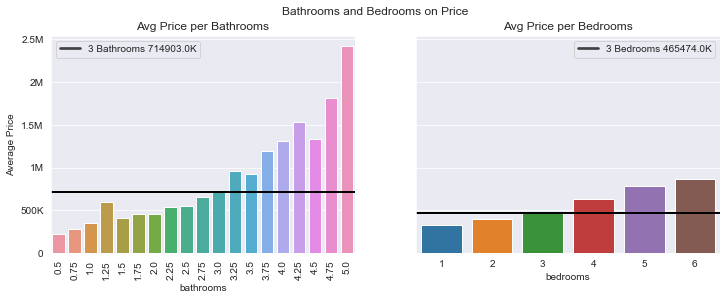

In [45]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize = (12, 4))
sns.barplot(x = bath, y=avbath_price, data = df, ax = axes[0])
axes[0].set_title('Avg Price per Bathrooms')
axes[0].set_ylabel('Average Price')
axes[0].set_yticklabels(y_tick)
axes[0].set_xticklabels(bath, rotation = 90)
axes[0].axhline(y = bath_mean, color = 'black', linewidth=2)
axes[0].legend([f'3 Bathrooms {bath_mean}K'])
sns.barplot(x = bed, y=avbed_price, data=df, ax = axes[1], ci = False)
axes[1].set_title('Avg Price per Bedrooms')
axes[1].axhline(y = bed_mean, color = 'black', linewidth=2)
axes[1].legend([f'3 Bedrooms {bed_mean}K'])
plt.suptitle('Bathrooms and Bedrooms on Price')
plt.savefig('Visualizations/Bed_Bath.png')
plt.show();


>From these findings, bathrooms tend to up the value of a home more than bedrooms. I am now more tempted to utilize bathrooms in the model than bedrooms. 

### *Sqft Living and Sqft Lot*

In [46]:
ylabels = ['0', '0', '1M', '2M', '3M', '4M', '5M', '6M', '7M']

<ipython-input-47-855ad35b5aac>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


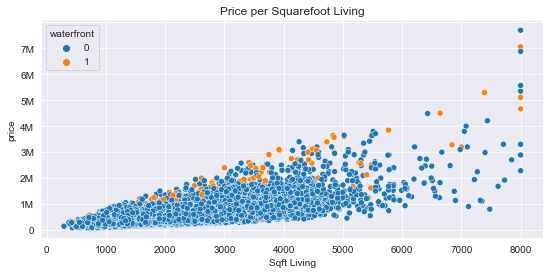

In [47]:
fig, ax = plt.subplots(figsize = (9, 4))
sns.scatterplot(x = 'sqft_living', y='price', data=df, hue = 'waterfront')
ax.set_title('Price per Squarefoot Living')
ax.set_yticklabels(ylabels)
ax.set_xlabel('Sqft Living')
plt.savefig('Visualizations/SLot.png')
plt.show();

The squarefoot living looks linear as expected. The waterfront column seems to have a great affect as well, being that it is mostly as the top of the linear trend.

### *Conditions and Grade*

In [48]:
condition = df.groupby('condition')['price'].mean().index
condition_price = df.groupby('condition')['price'].mean().values

grade = df.groupby('new_grades')['price'].mean().index
grade_price = df.groupby('new_grades')['price'].mean().values
y_labels = ['0', '100K', '200K', '300K', '400K', '500K', '600K']

<ipython-input-49-a4845bfcca9a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(y_labels)


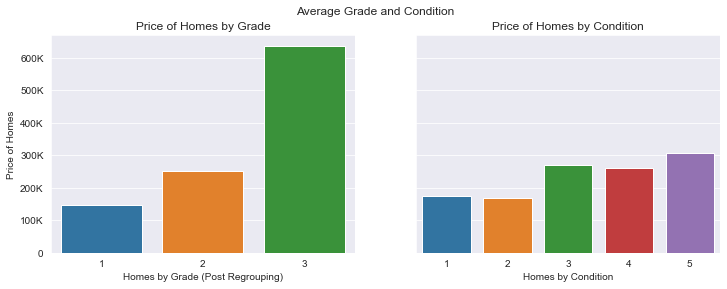

In [49]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4), sharey= True)
sns.barplot(x = grade, y=grade_price, data = df, ax = axes[0])
axes[0].set_title('Price of Homes by Grade')
axes[0].set_ylabel('Price of Homes')
axes[0].set_xlabel('Homes by Grade (Post Regrouping)')
axes[0].set_yticklabels(y_labels)
sns.barplot(x = condition, y=condition_price, data=df, ax = axes[1])
axes[1].set_title('Price of Homes by Condition')
axes[1].set_xlabel('Homes by Condition')
plt.suptitle('Average Grade and Condition')
plt.savefig('Visualizations/Condition_Renovation.png')
plt.show();

>In both grade and condition there is a general positive trend that as price increases the quality (via condition and grade) go up as well. This goes to show that people will pay more for quality.

### *Zipcode and Price*

In [50]:
zipc = df.groupby('zipcode')['price'].mean().index
av_price = df.groupby('zipcode')['price'].mean().values
y_ticks = ['0', '250K', '500K', '750K', '1M', '1.25M', '1.5M', '1.75M', '2M']

<ipython-input-51-48a698ef55c3>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticks)


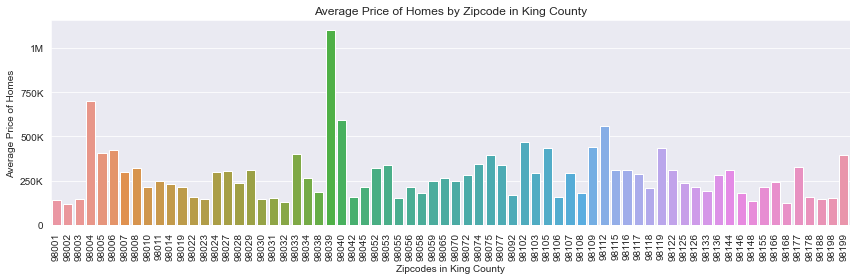

In [51]:
fig, ax = plt.subplots(figsize=(12, 4)) 
sns.barplot(x=zipc, y=av_price, data = df)
ax.set_xlabel('Zipcodes in King County')
ax.set_ylabel('Average Price of Homes')
ax.set_yticklabels(y_ticks)
ax.set_xticklabels(zipc, rotation = 90)
ax.set_title('Average Price of Homes by Zipcode in King County')
plt.savefig('Visualizations/Price_By_Zip.png')
plt.tight_layout();


>The graph above gives a clear indication of the zipcodes with higher or lower averaged home prices. This can give you a starting point for someone looking for a home in King County when taking into consideration their budget. Zipcode is definitely going into my model.

### *Price v Distance*

In [52]:
ylabels = ['0', '100K', '200K', '300K', '400K', '500K', '600K', '700K', '800K', '900K']

<ipython-input-53-b066753c725f>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


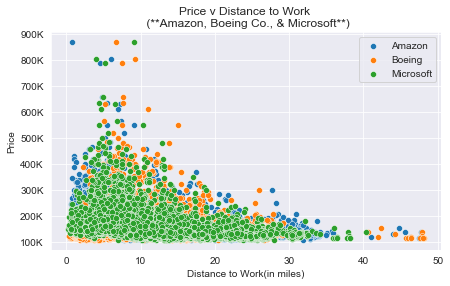

In [53]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.scatterplot(x='amazon', y='price', data = df)
sns.scatterplot(x='boeing', y='price', data = df)
sns.scatterplot(x='microsoft', y='price', data = df)
ax.set_xlabel('Distance to Work(in miles)')
ax.set_ylabel('Price')
ax.set_title('Price v Distance to Work \n (**Amazon, Boeing Co., & Microsoft**)')
ax.set_yticklabels(ylabels)
plt.legend(['Amazon', 'Boeing', 'Microsoft'])
plt.savefig('Visualizations/Distance.png')
plt.show();

>There is a general negative correlation between the price of a home and proximity to work. As the price goes up, the distance to work is often closer. Of these homes there is a cluster of them that are farthest away from Boeing that are considerably low in price.

### *Renovation/Sqft on Price*

<ipython-input-54-d0c7e79edaac>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


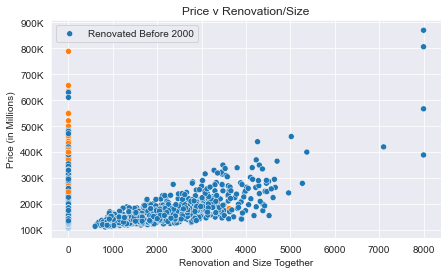

In [54]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.scatterplot(x='reno_size', y='price', data = df, hue = df['yr_built'] > 2000)
ax.set_xlabel('Renovation and Size Together')
ax.set_ylabel('Price (in Millions)')
ax.set_title('Price v Renovation/Size')
ax.set_yticklabels(ylabels)
plt.legend(['Renovated Before 2000'])
plt.savefig('Visualizations/PricevReno.png')
plt.show();

>Through the interaction variable we can see that the points on y=0 have NOT been renovated. It is interesting to note that higher priced homes on this list were built AFTER 2000. Additionally, for the homes that were renovated, the year was not as relevant, and the size of the home had an affect on the price of the home post renovation. 

>This is an interesting interaction and I would love to incorporate this into the model.

**Now that the visualizations have influenced my choices on my model's variables, I will proceed making more dummy variables for some of my variables of interest.**

In [55]:
#getting dummies for zipcode
df = pd.get_dummies(df, columns=['zipcode'], drop_first = True)

In [56]:
#getting a dummy for waterfront. It seemed to impact price. 
df = pd.get_dummies(df, columns=['waterfront'], drop_first = True)

In [57]:
df = pd.get_dummies(df, columns=['condition'], drop_first = True)

In [58]:
#getting dummies for new_grades
df = pd.get_dummies(df, columns = ['new_grades'], drop_first = True)

In [59]:
columns_to_use = ['amazon', 'boeing', 'microsoft','reno_size', 'yard_size2', 'bathrooms', 'waterfront_1', 'new_grades_2',
       'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_basement', 'sqft_above','new_grades_3', 'condition_2','condition_3','condition_4','condition_5','zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122',
       'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155',
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98188', 'zipcode_98198', 'zipcode_98199']

# ***RUNNING INITIAL MODEL AND ASSUMPTION CHECK***

In [60]:
outcome = 'price'
x_cols = columns_to_use
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     817.6
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:47:46   Log-Likelihood:            -2.3214e+05
No. Observations:               17290   AIC:                         4.645e+05
Df Residuals:                   17201   BIC:                         4.652e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.694e+04   4.33e+04     -0.622      0.534   -1.12e+05     5.8e+04
amazon        -3.243e+04   2536.204    -12.788      0.000   -3.74e+04   -2.75e+04
boeing         1.943e+04   2234.902      8.693      0.000     1.5e+04    2.38e+04
microsoft      5807.1874   1895.419      3.064      0.002    2091.972    9522.402
reno_size        38.9082      2.583     15.061      0.000      33.844      43.972
yard_size2    -3.022e-07   2.23e-07     -1.357      0.175   -7.39e-07    1.34e-07
bathrooms      8324.5026   2658.535      3.131      0.002    3113.503    1.35e+04
waterfront_1   8.185e+05   1.46e+04     56.117      0.000     7.9e+05    8.47e+05
new_grades_2  -2.307e+04   4652.978     -4.957      0.000   -3.22e+04   -1.39e+04
sqft_living    -549.6049     22.131    -24.834      0.000    -592.983    -506.226
sqft_lot          0.5081      0.111      4.563      0.000       0.290       0.726
sqft_living15    52.2003      3.196     16.333      0.000      45.936      58.465
sqft_lot15       -0.1688      0.087     -1.944      0.052      -0.339       0.001
sqft_basement   691.4424     21.826     31.680      0.000     648.661     734.223
sqft_above      734.5952     21.789     33.715      0.000     691.887     777.303
new_grades_3   2.055e+05   8125.325     25.286      0.000     1.9e+05    2.21e+05
condition_2    1.145e+05   3.65e+04      3.140      0.002     4.3e+04    1.86e+05
condition_3    1.207e+05   3.38e+04      3.566      0.000    5.44e+04    1.87e+05
condition_4    1.524e+05   3.39e+04      4.497      0.000     8.6e+04    2.19e+05
condition_5    1.994e+05   3.41e+04      5.849      0.000    1.33e+05    2.66e+05
zipcode_98002   1.72e+04   1.66e+04      1.038      0.299   -1.53e+04    4.97e+04
zipcode_98003 -8418.8531   1.48e+04     -0.570      0.569   -3.74e+04    2.05e+04
zipcode_98004  5.494e+05   2.82e+04     19.509      0.000    4.94e+05    6.05e+05
zipcode_98005  1.129e+05    3.1e+04      3.637      0.000     5.2e+04    1.74e+05
zipcode_98006  1.488e+05   2.44e+04      6.094      0.000    1.01e+05    1.97e+05
zipcode_98007  7.385e+04    3.3e+04      2.240      0.025    9215.524    1.38e+05
zipcode_98008  1.235e+05   3.28e+04      3.765      0.000    5.92e+04    1.88e+05
zipcode_98010  7.875e+04   2.37e+04      3.319      0.001    3.22e+04    1.25e+05
zipcode_98011 -1.449e+05   3.25e+04     -4.451      0.000   -2.09e+05   -8.11e+04
zipcode_98014  4.148e+04   3.39e+04      1.225      0.221   -2.49e+04    1.08e+05
zipcode_98019 -5.421e+04   3.42e+04     -1.587      0.113   -1.21e+05    1.28e+04
zipcode_98022  1.063e+05   1.94e+04      5.479      0.000    6.83e+04    1.44e+05
zipcode_98023 -4.589e+04   1.31e+04     -3.498      0.000   -7.16e+04   -2.02e+04
zipcode_98024   1.13e+05    3.3e+04      3.428      0.001    4.84e+04    1.78e+05
zipcode_98027  9.061e+04   2.43e+04      3.725   

In [61]:
lm = LinearRegression()
lm.fit(df[columns_to_use], df['price'])

LinearRegression()

In [62]:
y_pred = lm.predict(df[columns_to_use])
y_pred[:5]

array([ 390867.76027945,  868588.30454437, 1225435.34625078,
       1351737.50779999,  614216.7575071 ])

In [63]:
#checking the errors
mae = metrics.mean_absolute_error(df['price'], y_pred)
mse = metrics.mean_squared_error(df['price'], y_pred)
rmse = np.sqrt(mse)

print(mae)
print(rmse)

96556.36346882058
163978.90112766635


>The RMSE here tells us that the square root of the average of squared differences between the predictions and actual observation is around 163978. The fit could be better, so I will try to adjust for this after checking the assumptions.

#### Linearity

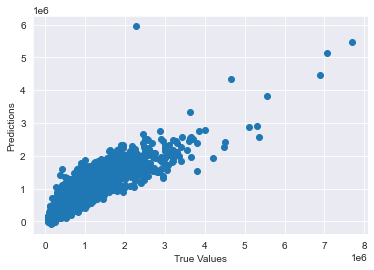

In [64]:
#The trend between price and predicted price is generally linear
plt.scatter( df['price'], y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions");

> For the most part, the model is linear.

#### Independence of Errors / Equal Variances

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

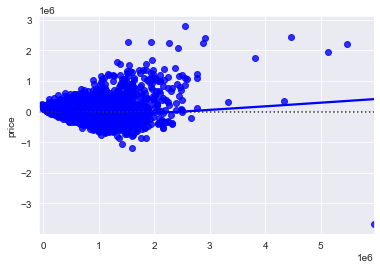

In [65]:
sns.residplot(y_pred, df['price'], lowess=True, color="b")

> The independence of errors / variances are increasing as price increases. This is not a pattern I want to see. I will have to do something to improve this. 

#### Normality of Errors

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


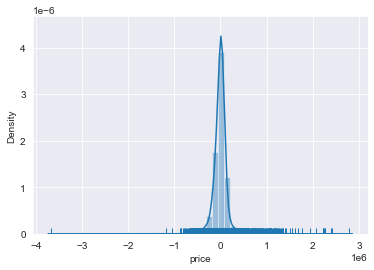

In [66]:
residuals =  df['price']- y_pred
sns.distplot(residuals, kde=True, rug=True);

>There is a thick visible prominent right tail. I will see if I can correct for this with the log of price.

# ***Making a First Adjustment***

I think the variables I chose do logically make sense in determining the price of a home. In my first 'model' the r2 value is not too high, but also not too low either.  

There is a large right tail with the residuals, as seen above, so I will try something else. I think a log transformation will help.

>In the hopes of making a better adjustment to the model, I am going to log the price variable because of the large right tail of the errors.

In [67]:
#creating the log of price variable
df['log_price'] = np.log(df['price'])

In [68]:
outcome = 'log_price'
x_cols = columns_to_use
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1328.
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:48:02   Log-Likelihood:                 4297.2
No. Observations:               17290   AIC:                            -8416.
Df Residuals:                   17201   BIC:                            -7726.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.8537      0.050    237.658      0.000      11.756      11.952
amazon           -0.0575      0.003    -19.711      0.000      -0.063      -0.052
boeing            0.0429      0.003     16.667      0.000       0.038       0.048
microsoft        -0.0011      0.002     -0.500      0.617      -0.005       0.003
reno_size      3.827e-05   2.97e-06     12.873      0.000    3.24e-05    4.41e-05
yard_size2    -1.787e-12   2.56e-13     -6.975      0.000   -2.29e-12   -1.28e-12
bathrooms         0.0370      0.003     12.089      0.000       0.031       0.043
waterfront_1      0.6588      0.017     39.242      0.000       0.626       0.692
new_grades_2      0.1167      0.005     21.798      0.000       0.106       0.127
sqft_living       0.0003   2.55e-05     11.559      0.000       0.000       0.000
sqft_lot       1.765e-06   1.28e-07     13.775      0.000    1.51e-06    2.02e-06
sqft_living15     0.0001   3.68e-06     36.248      0.000       0.000       0.000
sqft_lot15    -3.155e-07   9.99e-08     -3.158      0.002   -5.11e-07    -1.2e-07
sqft_basement    -0.0001   2.51e-05     -5.087      0.000      -0.000   -7.86e-05
sqft_above    -5.641e-05   2.51e-05     -2.250      0.024      -0.000   -7.26e-06
new_grades_3      0.1969      0.009     21.053      0.000       0.179       0.215
condition_2       0.2246      0.042      5.351      0.000       0.142       0.307
condition_3       0.3595      0.039      9.230      0.000       0.283       0.436
condition_4       0.4126      0.039     10.583      0.000       0.336       0.489
condition_5       0.4791      0.039     12.213      0.000       0.402       0.556
zipcode_98002    -0.0341      0.019     -1.790      0.073      -0.072       0.003
zipcode_98003     0.0016      0.017      0.093      0.926      -0.032       0.035
zipcode_98004     0.5271      0.032     16.263      0.000       0.464       0.591
zipcode_98005     0.2094      0.036      5.862      0.000       0.139       0.279
zipcode_98006     0.2753      0.028      9.797      0.000       0.220       0.330
zipcode_98007     0.1549      0.038      4.081      0.000       0.080       0.229
zipcode_98008     0.1941      0.038      5.145      0.000       0.120       0.268
zipcode_98010     0.2202      0.027      8.065      0.000       0.167       0.274
zipcode_98011    -0.2261      0.037     -6.035      0.000      -0.300      -0.153
zipcode_98014    -0.0207      0.039     -0.530      0.596      -0.097       0.056
zipcode_98019    -0.1364      0.039     -3.470      0.001      -0.214      -0.059
zipcode_98022     0.1971      0.022      8.824      0.000       0.153       0.241
zipcode_98023    -0.0331      0.015     -2.190      0.029      -0.063      -0.003
zipcode_98024     0.1561      0.038      4.114      0.000       0.082       0.230
zipcode_98027     0.2240      0.028      8.003   

The coefficient of determination has improved! Now I will check the errors and predictions.

In [69]:
lm_log = LinearRegression()

#fitting it to the data
lm_log.fit(df[columns_to_use], df['log_price'])

LinearRegression()

In [70]:
#generating predictions
y_log_pred = lm_log.predict(df[columns_to_use])

#exponentiating them to make them readable
y_log_exp = np.exp(y_log_pred)
y_log_exp[:5]

array([ 371325.40648883,  885483.72130387, 1150434.16389321,
       1371744.85132061,  601686.73200846])

In [71]:
mae = metrics.mean_absolute_error(df['price'], y_log_exp)
mse = metrics.mean_squared_error(df['price'], y_log_exp)
rmse = np.sqrt(mse)

print(mae)
print(rmse)

79371.57979148459
149349.32359257643


>The RMSE here tells us that the square root of the average of squared differences between the predictions and actual observation is around 149349. This is an improvement from the previous model. I will also check the assumptions for this.

#### Linearity

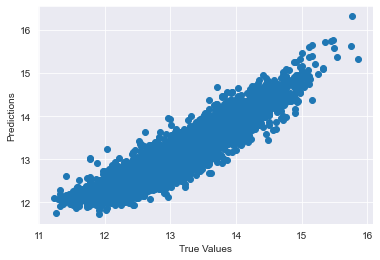

In [72]:
#The trend between log_price and log_predicted price is generally linear
plt.scatter( df['log_price'], y_log_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions");

#### Independence of Errors / Equal Variances

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='log_price'>

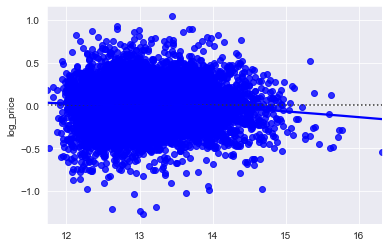

In [73]:
sns.residplot(y_log_pred, df['log_price'], lowess=True, color="b")

> The independence of errors looks more homoscedastic.

#### Normality of Errors

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


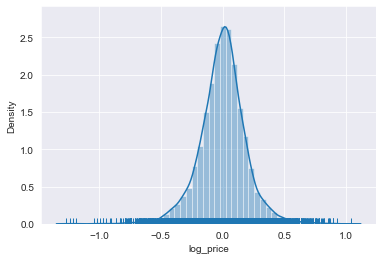

In [74]:
residuals =  df['log_price']- y_log_pred
sns.distplot(residuals, kde=True, rug=True);

> The residuals are now much more normally distributed.

# ***Train/Test Split***

Now that I have a more favorable model with the log of price, I am going to perform a train test split of the data.

In [75]:
#renaming the independent and dependent variables
df_features = df[columns_to_use]
#the target is the LOG of price
target = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=8, test_size=.2)

In [76]:
#logging price variable
y_log = np.log(y_train)

lm = LinearRegression()

#fitting the training model
lm = lm.fit(X_train, y_log)

#getting predictions
log_train_pred = lm.predict(X_train)
#Exponentiating because the y_train is already logged
y_train_pred = np.exp(log_train_pred)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training RMSE:' , train_rmse)

Training RMSE: 150072.0316756194


In [77]:
#use fitted model to predict on the test examples
log_test_pred = lm.predict(X_test)
y_test_pred = np.exp(log_test_pred)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing RMSE:' , test_rmse)


print('Training RMSE: ', int(train_rmse), ", Testing RMSE: ", int(test_rmse))

Testing RMSE: 138692.42785678388
Training RMSE:  150072 , Testing RMSE:  138692


According to these RMSE results, doesn't look overfit. I would like to try a quick feature selection to see if I can make another improvement.

# ***Implementing SelectKBest***

I am making another attempt at improving the model.

In [78]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

selector = SelectKBest(f_regression, k=60)

selector.fit(X_train, y_train)

SelectKBest(k=60, score_func=<function f_regression at 0x7ff368219e50>)

In [79]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
#showing the first 5 of the selected columns
selected_columns[:5]

Index(['amazon', 'boeing', 'microsoft', 'reno_size', 'yard_size2'], dtype='object')

In [80]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)



Training Root Mean Squared Error: 169520.05989292738
Testing Root Mean Squared Error: 168248.45962143815


# ***Model Decision***

In [81]:
print(f'Log \nTrain: {train_rmse} Test: {test_rmse} \nSKB \nTrain: {trainK_rmse}, Test: {testK_rmse}')

Log 
Train: 150072.0316756194 Test: 138692.42785678388 
SKB 
Train: 169520.05989292738, Test: 168248.45962143815


First I made the decision to log target in the model because it created a more linear fit and better predictions on the target. From the two models I ran above I decided to go with the original Log model because the predictions were closer to the target.

# ***Fitting the Final Model / Pickling***

In [82]:
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm.fit(df[columns_to_use], np.log(df['price']))

In [83]:
len(columns_to_use)

88

In [84]:
len(lm.coef_)

88

In [85]:
import pickle


pickle_out = open("Data/model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()
